In [ ]:
# importação de bibliotecas gráficas e matematicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# importação da bibliotca yfinance do yahoo finanças, para a extração de dados direto do site
try:
  import yfinance as yf
except:
  ! pip install yfinance
  import yfinance as yf

# importação das bibliotecas de configurações da rede neural
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import sklearn
from sklearn.preprocessing import MinMaxScaler

# para pegar a maior 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
data_frame = yf.download(tickers='ABEV3.SA', start='2007-08-01', end='2022-10-16')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_frame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-08-01 00:00:00-03:00,5.230289,5.230289,5.230289,5.230289,3.229515,85971
2007-08-02 00:00:00-03:00,5.341604,5.341604,5.114259,5.214147,3.219548,1756969
2007-08-03 00:00:00-03:00,5.174192,5.194170,4.998390,5.106268,3.152935,265297
2007-08-06 00:00:00-03:00,5.042340,5.162605,5.034349,5.162605,3.187721,788383
2007-08-07 00:00:00-03:00,5.080298,5.174192,5.080298,5.170197,3.192410,460516
...,...,...,...,...,...,...
2022-10-07 00:00:00-03:00,15.960000,16.040001,15.300000,15.420000,15.420000,40213400
2022-10-10 00:00:00-03:00,15.460000,15.470000,15.060000,15.200000,15.200000,29475700
2022-10-11 00:00:00-03:00,15.180000,15.270000,14.940000,14.990000,14.990000,30204200


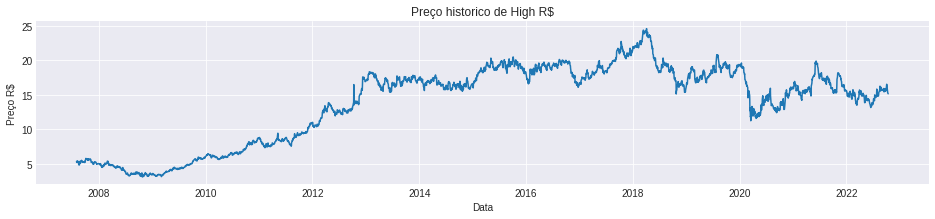

In [ ]:
# Definindo uma função para a plotagem e gráficos
def plot_graph(data_frame, coluna):
  '''
  data_frame: Informar o data frame a ser utilizado.
  coluna: Informar a coluna o ata frame a ser plotada
  tamanho padrão de 16,5
  printa a evolução do preço
  '''
  plt.style.use('seaborn-darkgrid')
  plt.figure(figsize=(16,3))
  plt.title(f'Preço historico de {coluna} R$')
  plt.plot(data_frame[coluna]) 
  plt.xlabel('Data')
  plt.ylabel('Preço R$')
  plt.show()

#Test the function
plot_graph(data_frame,'High')

In [ ]:
def column_sep(data_frame, coluna):
  col = data_frame[coluna].values
  col = col.reshape(-1,1)
  return col

df_open = column_sep(data_frame, 'Open')
df_high = column_sep(data_frame, 'High')
df_low = column_sep(data_frame, 'Low')
df_close = column_sep(data_frame, 'Close')

In [ ]:
scaler_open = MinMaxScaler()
scaler_high = MinMaxScaler()
scaler_low = MinMaxScaler()
scaler_close = MinMaxScaler()

In [ ]:
df_open_scal = scaler_open.fit_transform(df_open)
df_high_scal = scaler_high.fit_transform(df_high)
df_low_scal = scaler_low.fit_transform(df_low)
df_close_scal = scaler_close.fit_transform(df_close)

In [ ]:
df_open_scal[0][0]

0.10622816276403207

In [ ]:
df_open_scal[:5]

array([[0.10622816],
       [0.11142085],
       [0.10361132],
       [0.09746061],
       [0.09923131]])

In [ ]:
df_high_scal[:5]

array([[0.10031816],
       [0.10549922],
       [0.09863704],
       [0.09716787],
       [0.09770718]])

In [ ]:
df_low_scal[:5]

array([[0.11375467],
       [0.10828484],
       [0.10282263],
       [0.10451778],
       [0.10668388]])

In [ ]:
df_close_scal[:5]

array([[0.11001228],
       [0.10925775],
       [0.10421507],
       [0.10684847],
       [0.10720336]])

In [ ]:
df_scal = list()
intermed = list()

for i in range(len(df_open_scal)):
  intermed.append(df_open_scal[i][0])
  intermed.append(df_high_scal[i][0])
  intermed.append(df_low_scal[i][0])
  intermed.append(df_close_scal[i][0])
  intermed2 = intermed.copy()
  df_scal.append(intermed2)
  intermed.clear()

df_scal = np.array(df_scal)
df_scal[:5]

array([[0.10622816, 0.10031816, 0.11375467, 0.11001228],
       [0.11142085, 0.10549922, 0.10828484, 0.10925775],
       [0.10361132, 0.09863704, 0.10282263, 0.10421507],
       [0.09746061, 0.09716787, 0.10451778, 0.10684847],
       [0.09923131, 0.09770718, 0.10668388, 0.10720336]])

In [ ]:
# separação entre os dados de entrada e os dados de saída
def split_sequences(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps # encontrar o fim da sequencia
    if end_ix >= len(sequence): # verificando se estamos no ultimo elemento previsivel do dataset
      break
    seq_x = sequence[i:end_ix]
    seq_y = sequence[end_ix][1] 
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
steps = 3
X0, y0 = split_sequences(df_scal, steps)

In [ ]:
X0, y0

(array([[[0.10622816, 0.10031816, 0.11375467, 0.11001228],
         [0.11142085, 0.10549922, 0.10828484, 0.10925775],
         [0.10361132, 0.09863704, 0.10282263, 0.10421507]],
 
        [[0.11142085, 0.10549922, 0.10828484, 0.10925775],
         [0.10361132, 0.09863704, 0.10282263, 0.10421507],
         [0.09746061, 0.09716787, 0.10451778, 0.10684847]],
 
        [[0.10361132, 0.09863704, 0.10282263, 0.10421507],
         [0.09746061, 0.09716787, 0.10451778, 0.10684847],
         [0.09923131, 0.09770718, 0.10668388, 0.10720336]],
 
        ...,
 
        [[0.6202812 , 0.61368493, 0.62051142, 0.62044062],
         [0.60675314, 0.60344528, 0.58845528, 0.5863177 ],
         [0.58342889, 0.57691518, 0.57714134, 0.57603406]],
 
        [[0.60675314, 0.60344528, 0.58845528, 0.5863177 ],
         [0.58342889, 0.57691518, 0.57714134, 0.57603406],
         [0.57036732, 0.56760639, 0.57148433, 0.56621787]],
 
        [[0.58342889, 0.57691518, 0.57714134, 0.57603406],
         [0.57036732, 0.56

In [ ]:
train_size = int(len(data_frame)*0.7) # definindo o tamanho do conjunto de treino 70% dos dados
X = X0[:train_size] # separando o conjunto de treino
X_test = X0[train_size:] # separando o conjunto de teste
y = y0[:train_size] # separando o conjunto de treino
y_test = y0[train_size:] # separando o conjunto de teste

# verificando se X está tridimensional
X.shape

(2639, 3, 4)

In [ ]:
model = Sequential() # definindo nosso modelo pelo função Sequencial da bib Keras
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1], 4))) # adicionando 100 camadas LSTM ao modelo, returb quer dizer que a saida tem o mesmo tamanho da entrada
model.add(LSTM(100, return_sequences=False)) # mais 100 camadas queremos somente a ultima saida
model.add(Dense(25)) # 25 camadas densas
model.add(Dense(1)) # 1 camada de saida
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 100)            42000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 124,951
Trainable params: 124,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error') # compilando a nossa rede com a função de perda MSE e otimizador ADAM
model.fit(X, y, batch_size= 128, epochs=100) # O algoritmo vai rodar 10 vezes no conunto de treino

Epoch 1/100
21/21 [==============================] - 3s 13ms/step - loss: 0.0675
Epoch 2/100
21/21 [==============================] - 0s 22ms/step - loss: 0.0080
Epoch 3/100
21/21 [==============================] - 0s 20ms/step - loss: 0.0010
Epoch 4/100
21/21 [==============================] - 0s 20ms/step - loss: 2.4320e-04
Epoch 5/100
21/21 [==============================] - 0s 24ms/step - loss: 1.6984e-04
Epoch 6/100
21/21 [==============================] - 0s 22ms/step - loss: 1.5874e-04
Epoch 7/100
21/21 [==============================] - 0s 22ms/step - loss: 1.5619e-04
Epoch 8/100
21/21 [==============================] - 0s 22ms/step - loss: 1.5300e-04
Epoch 9/100
21/21 [==============================] - 0s 24ms/step - loss: 1.4888e-04
Epoch 10/100
21/21 [==============================] - 0s 21ms/step - loss: 1.4627e-04
Epoch 11/100
21/21 [==============================] - 0s 20ms/step - loss: 1.4414e-04
Epoch 12/100
21/21 [==============================] - 1s 26ms/step - loss: 

In [ ]:
predictions = model.predict(X_test)
predictions = scaler_high.inverse_transform(predictions)
predictions

36/36 [==============================] - 1s 2ms/step


array([[23.944965],
       [23.925652],
       [23.883898],
       ...,
       [15.871975],
       [15.484705],
       [15.248462]], dtype=float32)

In [ ]:
y_test = scaler_high.inverse_transform(y_test.reshape(-1, 1))
y_test

array([[24.06999969],
       [23.96999931],
       [24.20999908],
       ...,
       [15.27000046],
       [15.15999985],
       [15.11999989]])

In [ ]:
comp1 = pd.DataFrame(predictions)
comp2 = pd.DataFrame(y_test)

In [ ]:
comp = pd.DataFrame()

In [ ]:
comp['teste'] = comp2
comp['previsões'] = comp1

In [ ]:
comp

,teste,previsões
0,24.070000,23.944965
1,23.969999,23.925652
2,24.209999,23.883898
3,24.129999,23.873133
4,24.200001,23.901310
...,...,...
1124,16.040001,16.342854
1125,15.470000,16.153585
1126,15.270000,15.871975
1127,15.160000,15.484705


In [ ]:
data_frame['High'][train_size:]

Date
2018-03-22 00:00:00-03:00    24.080000
2018-03-23 00:00:00-03:00    24.150000
2018-03-26 00:00:00-03:00    24.150000
2018-03-27 00:00:00-03:00    24.070000
2018-03-28 00:00:00-03:00    23.969999
                               ...    
2022-10-07 00:00:00-03:00    16.040001
2022-10-10 00:00:00-03:00    15.470000
2022-10-11 00:00:00-03:00    15.270000
2022-10-13 00:00:00-03:00    15.160000
2022-10-14 00:00:00-03:00    15.120000
Name: High, Length: 1132, dtype: float64

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.07237532795584231

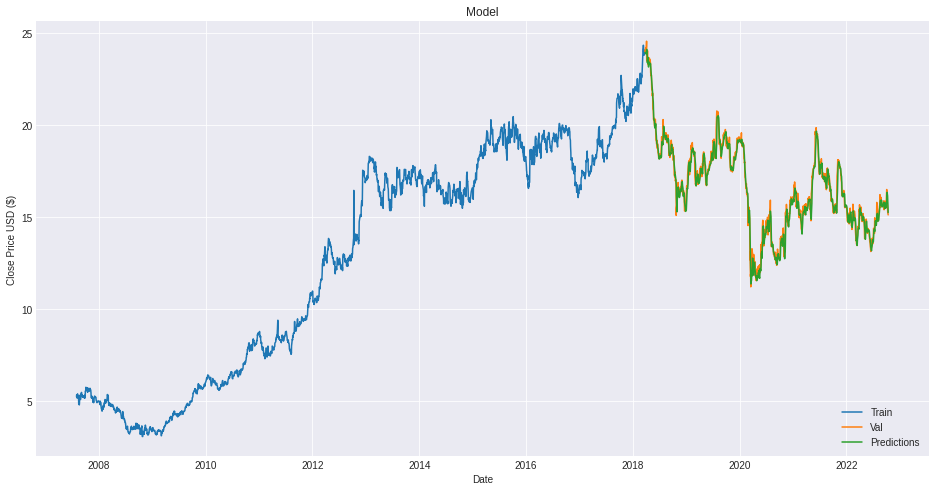

In [ ]:
data = data_frame['High']
train = data[:train_size]
validation = pd.DataFrame(data[train_size+3:])
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['High', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

garantir que os termos comparados estão equivalentes